In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import torch
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader,TensorDataset,random_split

In [4]:
batch_size=64
learning_rate=5e-7
DATASET_URL="https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
DATA_FILENAME="BostonHousing.csv"
TARGET_COLUMN='medv'
input_size=13
output_size=1

In [5]:
download_url(DATASET_URL,'.')
dataframe=pd.read_csv(DATA_FILENAME)
dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
inputs=dataframe.drop('medv',axis=1).values
targets=dataframe[['medv']].values
inputs.shape,targets.shape

((506, 13), (506, 1))

In [7]:
dataset=TensorDataset(torch.tensor(inputs,dtype=torch.float32),torch.tensor(targets,dtype=torch.float32))

In [8]:
train_ds,val_ds=random_split(dataset,[406,100])
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size*2)

In [9]:
class HousingModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)
  
  def forward(self,xb):
    out=self.linear(xb)
    return out

  def training_step(self,batch):
    inputs,targets=batch
    out=self(inputs)
    loss=F.mse_loss(out,targets)
    return loss

  def validation_step(self,batch):
    inputs,targets=batch
    out=self(inputs)
    loss=F.mse_loss(out,targets)
    return {'val_loss': loss.detach()}

  def validation_epoch_end(self,outputs):
    batch_losses=[x['val_loss']for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean()
    return {'val_loss': epoch_loss.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}], val_loss: {:.4f}".format(epoch,result['val_loss']))

model=HousingModel()

In [10]:
jovian.commit(project='linear-regression-project')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/sagarp3199/linear-regression-project


'https://jovian.ai/sagarp3199/linear-regression-project'

In [11]:
def evaluate(model,val_loader):
  outputs=[model.validation_step(batch)for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  history=[]
  optimizer=opt_func(model.parameters(),lr)
  for epoch in range(epochs):
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result=evaluate(model,val_loader)
    model.epoch_end(epoch,result)
    history.append(result)
  return history

In [12]:
result=evaluate(model,val_loader)
result

{'val_loss': 8400.173828125}

In [13]:
history=fit(10,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss: 1468.5804
Epoch [1], val_loss: 1080.2959
Epoch [2], val_loss: 815.0941
Epoch [3], val_loss: 627.1868
Epoch [4], val_loss: 488.7299
Epoch [5], val_loss: 387.3762
Epoch [6], val_loss: 310.4592
Epoch [7], val_loss: 260.4851
Epoch [8], val_loss: 219.2723
Epoch [9], val_loss: 192.9875


In [14]:
history=fit(20,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss: 171.3803
Epoch [1], val_loss: 155.3433
Epoch [2], val_loss: 147.5840
Epoch [3], val_loss: 136.1706
Epoch [4], val_loss: 128.3683
Epoch [5], val_loss: 124.1020
Epoch [6], val_loss: 123.5967
Epoch [7], val_loss: 121.4124
Epoch [8], val_loss: 118.0621
Epoch [9], val_loss: 113.3457
Epoch [10], val_loss: 112.9448
Epoch [11], val_loss: 115.4549
Epoch [12], val_loss: 114.9620
Epoch [13], val_loss: 113.3336
Epoch [14], val_loss: 111.8063
Epoch [15], val_loss: 108.0742
Epoch [16], val_loss: 108.1532
Epoch [17], val_loss: 106.2346
Epoch [18], val_loss: 106.6726
Epoch [19], val_loss: 105.5803


In [15]:
history=fit(40,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss: 105.4639
Epoch [1], val_loss: 107.2720
Epoch [2], val_loss: 106.4940
Epoch [3], val_loss: 104.2232
Epoch [4], val_loss: 104.5907
Epoch [5], val_loss: 103.6408
Epoch [6], val_loss: 103.5491
Epoch [7], val_loss: 105.6385
Epoch [8], val_loss: 103.5856
Epoch [9], val_loss: 102.8052
Epoch [10], val_loss: 102.7293
Epoch [11], val_loss: 104.2400
Epoch [12], val_loss: 101.7420
Epoch [13], val_loss: 105.0999
Epoch [14], val_loss: 103.6604
Epoch [15], val_loss: 102.7182
Epoch [16], val_loss: 102.6542
Epoch [17], val_loss: 101.6475
Epoch [18], val_loss: 100.7500
Epoch [19], val_loss: 101.3673
Epoch [20], val_loss: 100.7911
Epoch [21], val_loss: 100.8022
Epoch [22], val_loss: 103.0635
Epoch [23], val_loss: 100.9625
Epoch [24], val_loss: 99.4600
Epoch [25], val_loss: 100.0709
Epoch [26], val_loss: 102.3457
Epoch [27], val_loss: 99.5321
Epoch [28], val_loss: 99.3268
Epoch [29], val_loss: 99.2696
Epoch [30], val_loss: 98.5594
Epoch [31], val_loss: 101.7679
Epoch [32], val_loss: 9

In [16]:
history=fit(50,learning_rate,model,train_loader,val_loader)

Epoch [0], val_loss: 99.9237
Epoch [1], val_loss: 98.2793
Epoch [2], val_loss: 98.2741
Epoch [3], val_loss: 97.6148
Epoch [4], val_loss: 96.7653
Epoch [5], val_loss: 96.3722
Epoch [6], val_loss: 98.1641
Epoch [7], val_loss: 96.5131
Epoch [8], val_loss: 96.2107
Epoch [9], val_loss: 97.0937
Epoch [10], val_loss: 101.5521
Epoch [11], val_loss: 96.0488
Epoch [12], val_loss: 97.1879
Epoch [13], val_loss: 96.7964
Epoch [14], val_loss: 95.8958
Epoch [15], val_loss: 97.2948
Epoch [16], val_loss: 96.6933
Epoch [17], val_loss: 95.7320
Epoch [18], val_loss: 95.1270
Epoch [19], val_loss: 98.4793
Epoch [20], val_loss: 96.6125
Epoch [21], val_loss: 94.7892
Epoch [22], val_loss: 94.5068
Epoch [23], val_loss: 96.6954
Epoch [24], val_loss: 94.3320
Epoch [25], val_loss: 94.7889
Epoch [26], val_loss: 94.5794
Epoch [27], val_loss: 95.2707
Epoch [28], val_loss: 95.0873
Epoch [29], val_loss: 96.6166
Epoch [30], val_loss: 95.7879
Epoch [31], val_loss: 95.1554
Epoch [32], val_loss: 95.8138
Epoch [33], val_los

Text(0.5, 1.0, 'val_loss vs epochs')

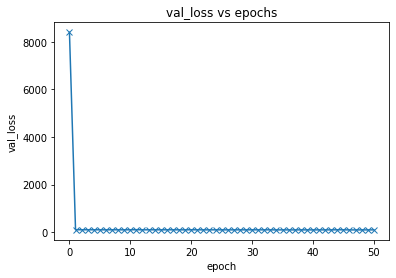

In [17]:
losses=[r['val_loss']for r in [result]+history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs epochs')

In [18]:
def predict_single(x,model):
  xb=x.unsqueeze(0)
  return model(x).item()

In [19]:
x, target = val_ds[10]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([4.8190e-02, 8.0000e+01, 3.6400e+00, 0.0000e+00, 3.9200e-01, 6.1080e+00,
        3.2000e+01, 9.2203e+00, 1.0000e+00, 3.1500e+02, 1.6400e+01, 3.9289e+02,
        6.5700e+00])
Target:  21.899999618530273
Prediction: 24.335554122924805


In [20]:
torch.save(model.state_dict(), 'housing-linear.pth')

In [ ]:
jovian.commit(project='housing-linear-minimal', environment=None, outputs=['housing-linear.pth'])
jovian.commit(project='housing-linear-minimal', environment=None, outputs=['housing-linear.pth'])